Gaurav Pradeep-Group 1
Linear Regression Model to predict the sale price of houses using 10 input features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')
data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000


In [3]:
x=data.iloc[:,:10]
y=data.iloc[:,10]

In [4]:
w_vec=np.zeros(10)
x_vec=np.zeros((1168,10))
y_vec=np.zeros((1168,1))

In [5]:
for i in range(len(data)):
    y_vec[i][0]=data.iloc[i,10]
print(y_vec)

[[184000.]
 [164000.]
 [130000.]
 ...
 [115000.]
 [165500.]
 [180500.]]


In [6]:
for i in range(len(data)):
    for j in range(10):
        x_vec[i][j]=data.iloc[i,j]
print(x_vec)

[[7.000e+00 1.820e+03 1.000e+00 ... 8.000e+00 1.925e+03 1.950e+03]
 [7.000e+00 1.646e+03 1.000e+00 ... 7.000e+00 1.941e+03 1.950e+03]
 [5.000e+00 1.316e+03 2.000e+00 ... 6.000e+00 1.929e+03 2.001e+03]
 ...
 [5.000e+00 7.890e+02 1.000e+00 ... 5.000e+00 1.948e+03 1.950e+03]
 [6.000e+00 1.661e+03 1.000e+00 ... 8.000e+00 1.955e+03 1.996e+03]
 [7.000e+00 1.442e+03 2.000e+00 ... 5.000e+00 1.990e+03 1.990e+03]]


In [7]:
def cost_fn(w_vec,b):
    j=0
    for i in range(len(data)):
        j+=((np.dot(w_vec,x_vec[i])+b)-y_vec[i][0])**2
    j=j/(2*float(len(data)))
    
    return j

In [8]:
def grad_descent(w_c,b_c,l):
    dj_dw=np.zeros(10)
    dj_db=0
    for i in range(10):
        for j in range(len(data)):
            dj_dw[i]+=((np.dot(w_c,x_vec[j])+b_c)-y_vec[j][0])*x_vec[j][i]
        dj_dw[i]=dj_dw[i]*l*(1/len(data))
    for i in range(len(data)):
        dj_db+=((np.dot(w_c,x_vec[i])+b_c)-y_vec[i][0])
    dj_db=dj_db*l*(1/len(data))
    
    w_vec=w_c-dj_dw
    b=b_c-dj_db
    return w_vec,b

In [9]:
b=0
l=10**-8
epochs=20000
costs=[]


In [10]:
for i in range(epochs):
    w_vec,b=grad_descent(w_vec,b,l)
    j1=cost_fn(w_vec,b)
    costs.append(j1)

In [11]:
print(w_vec)

[  4.63435579  68.10069741   1.04198846 110.49781707  49.00752197
  -6.05746109   0.70742981  -0.25043509   9.58998014 -19.39466633]


In [12]:
print(b)

-0.043467719193381125


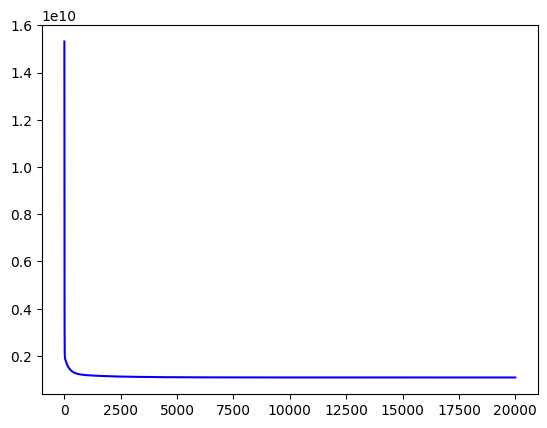

In [13]:
plt.plot(list(range(epochs)),costs,color="blue")
plt.show()

In [14]:
test=pd.read_csv('test.csv')
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000


In [15]:
x_test=np.zeros((292,10))
y_test=np.zeros((292,1))

In [16]:
for i in range(len(test)):
    y_test[i][0]=test.iloc[i,10]


In [17]:
for i in range(len(test)):
    for j in range(10):
        x_test[i][j]=test.iloc[i,j]
print(x_test)

[[8.000e+00 1.970e+03 3.000e+00 ... 8.000e+00 2.006e+03 2.006e+03]
 [6.000e+00 1.632e+03 1.000e+00 ... 6.000e+00 1.958e+03 1.988e+03]
 [7.000e+00 1.223e+03 2.000e+00 ... 4.000e+00 2.005e+03 2.005e+03]
 ...
 [6.000e+00 8.480e+02 2.000e+00 ... 4.000e+00 2.003e+03 2.003e+03]
 [7.000e+00 1.266e+03 2.000e+00 ... 6.000e+00 2.007e+03 2.007e+03]
 [6.000e+00 1.484e+03 2.000e+00 ... 8.000e+00 2.005e+03 2.007e+03]]


In [21]:
from sklearn.metrics import r2_score

In [22]:
y_predict=np.zeros((len(test),1))

In [23]:
for i in range(len(test)):
    y_predict[i]=np.dot(x_test[i],w_vec)+b


In [24]:
R_square = r2_score(y_test,y_predict) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.671942691438387
